# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv', index_col = 'User ID')

# Show first 5 Row


In [3]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Display Information about Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 195.3+ KB


# Display Number of class for each columns

In [5]:
df.nunique()

Subscription Type      3
Monthly Revenue        6
Join Date            300
Last Payment Date     26
Country               10
Age                   26
Gender                 2
Device                 4
Plan Duration          1
dtype: int64

# One Column

# 1. Qualitative Data

In [6]:
df_categorical = ['Subscription Type', 'Country', 'Gender', 'Device']

In [7]:
def categorical_data(df, feature_name):
    labels = list(df[feature_name].unique())
    count = list(df[feature_name].value_counts())
    
    
    
    plt.figure(figsize = (13, 5))
 
    # creating the bar plot
    plt.bar(labels,count, color ='maroon',
            width = 0.4)
    plt.xlabel(feature_name, fontsize=13)
    plt.ylabel("No. of people enrolled")
    plt.title(f"People enrolled in different {feature_name}")
    plt.xticks(rotation=25)
    
    
    
    
    fig = plt.figure(figsize=(13, 7))
    plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # Adding a title
    plt.title(f"People enrolled in different {feature_name}")
    plt.legend(labels, title=feature_name, loc='best')

    # Show the plot
    plt.show()
    

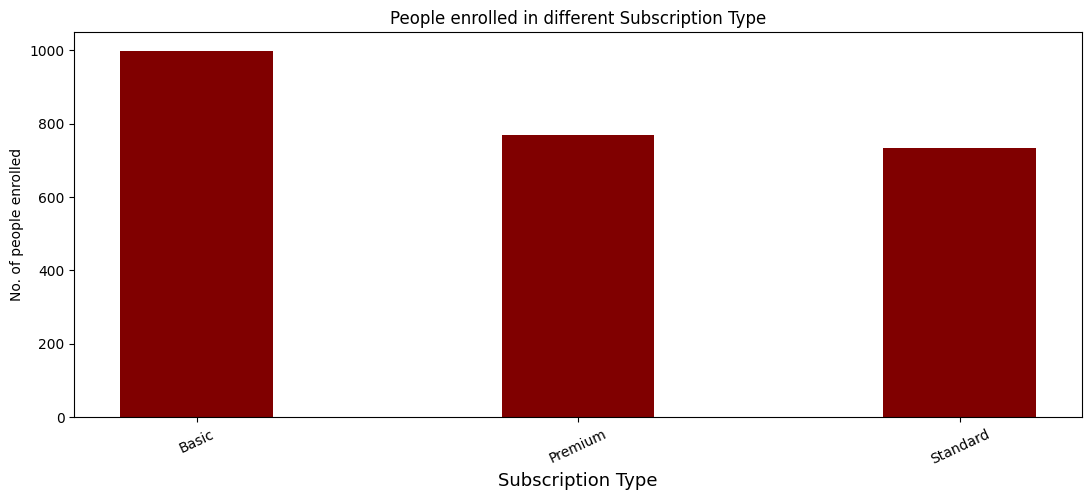

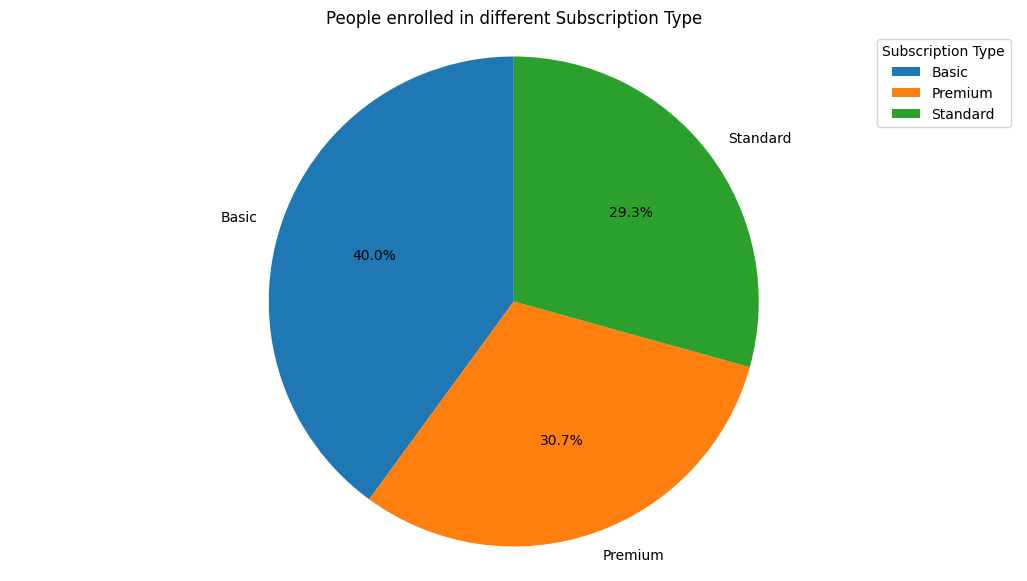


 ----------------------------------------------------------------------------------------------------------------------------- 



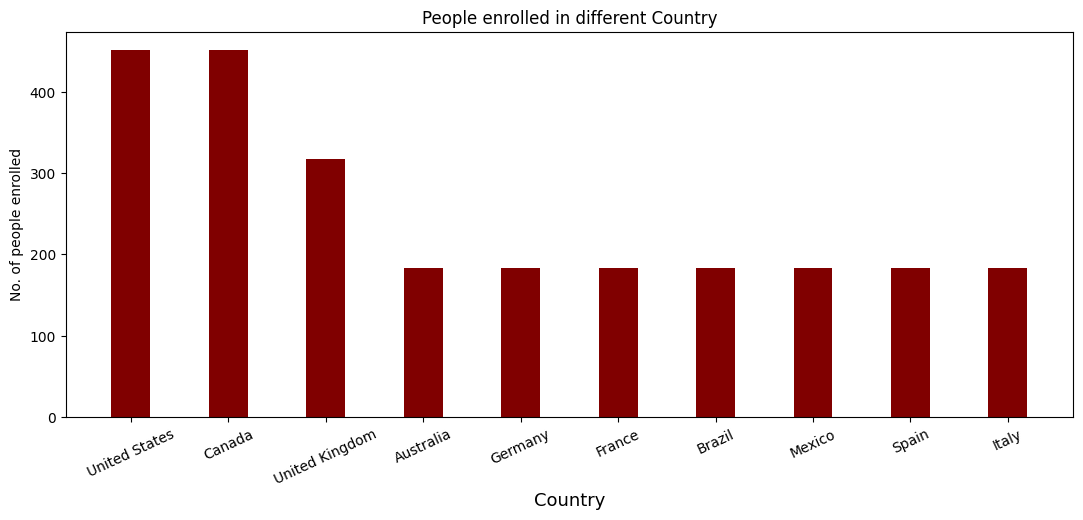

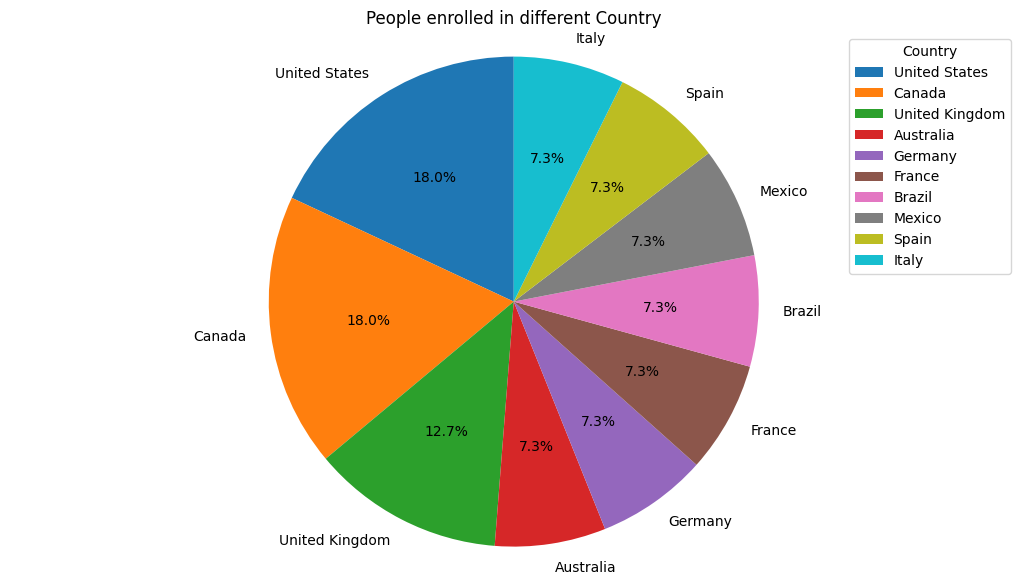


 ----------------------------------------------------------------------------------------------------------------------------- 



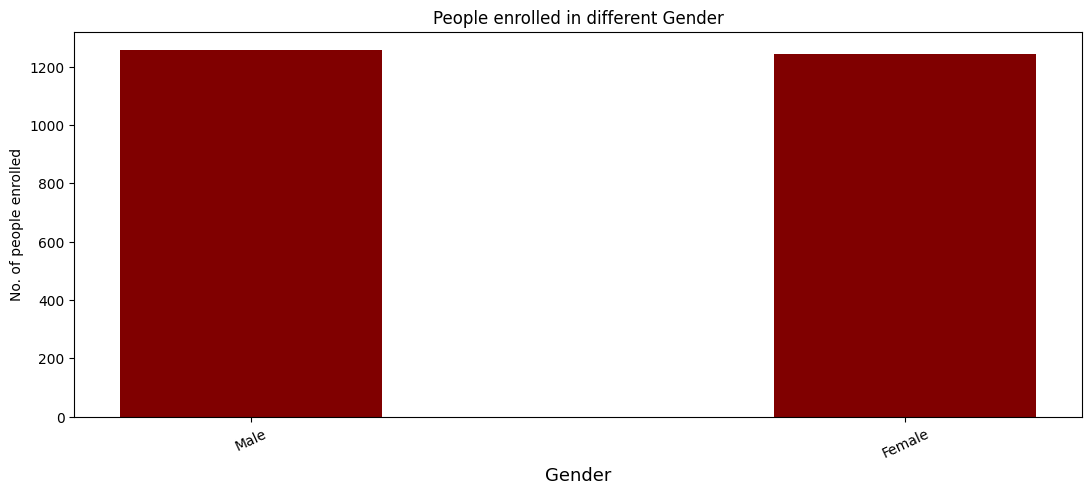

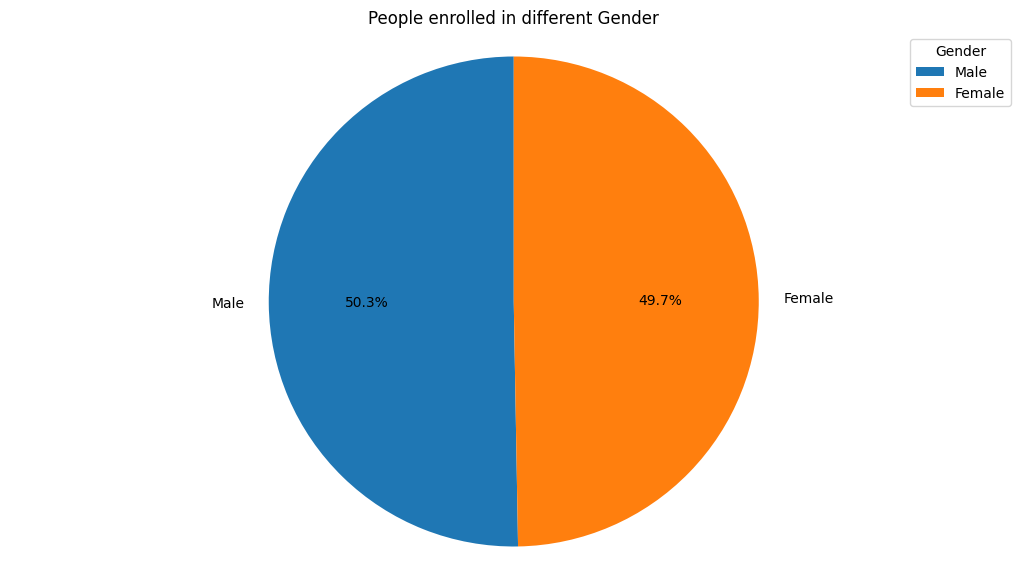


 ----------------------------------------------------------------------------------------------------------------------------- 



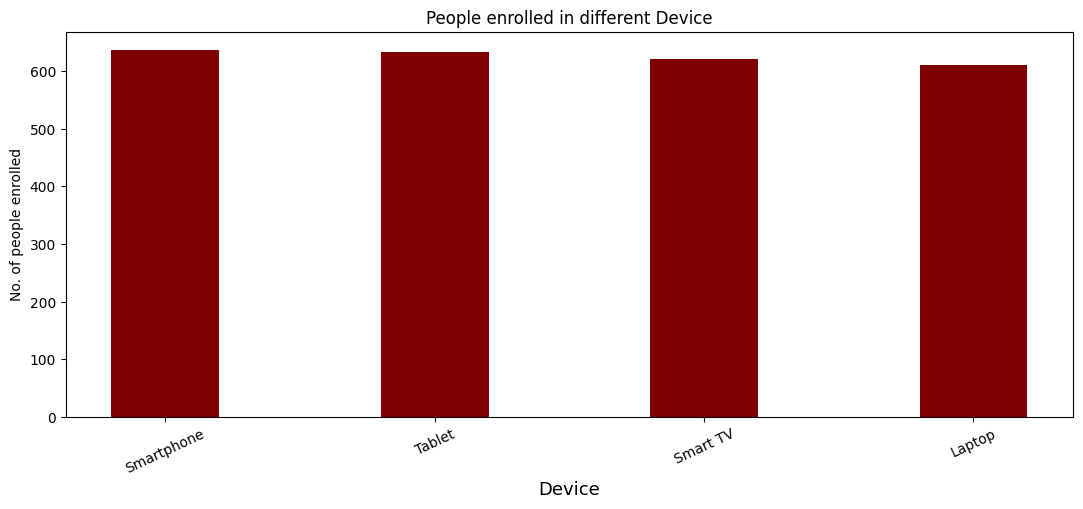

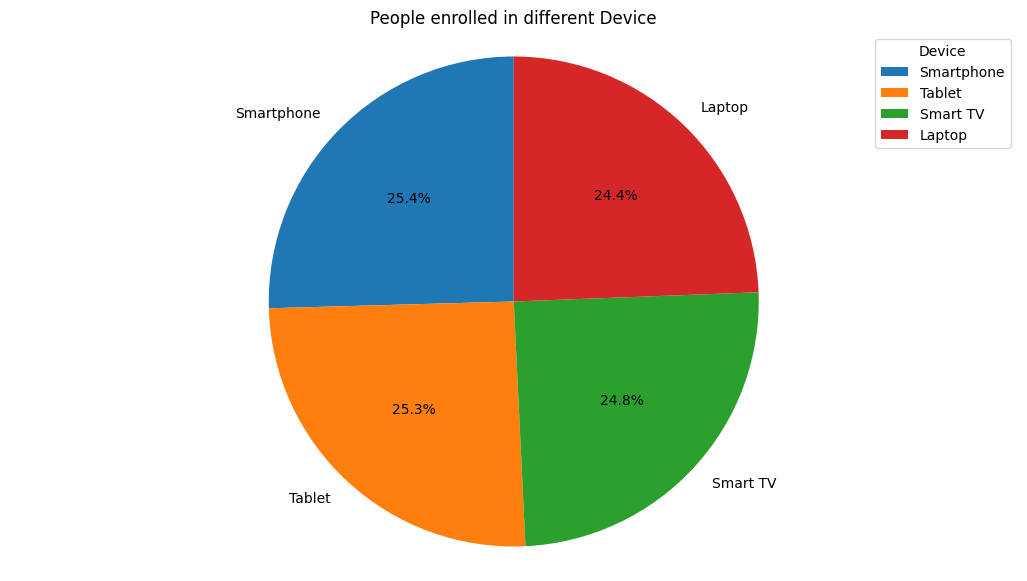

In [8]:
for i in range(len(df_categorical)): 
    categorical_data(df, df_categorical[i])
    if i != len(df_categorical) -1:
        print('\n', 125*'-', '\n')

# 2. Quantitave Data 

    A. Discrete (Monthly Revenue)
    
    B. Continoues (Age)

In [9]:
df_numarical = ['Monthly Revenue', 'Age']

# A. Discrete

# The Features is Discreate Type

    1. Find min & max value 
    2. Find the measure of center (mean, meadin and mode)
    3. Find the Measure of spread (std)
    4. Display bar chart (count & probability)


# Monthly Revenue Column

## Step 1:
    Find min & max value 


In [10]:
print(f'The Min Value is: {df[df_numarical[0]].min()}')
print(f'The Max Value is: {df[df_numarical[0]].max()}')

The Min Value is: 10
The Max Value is: 15


## Step 2:
    Find the Measure of Center (mean, meadin and mode)


In [11]:
print(f'The Mean Value is: {df[df_numarical[0]].mean()}')
print(f'The Median Value is: {df[df_numarical[0]].median()}')
print(f'The Mode Value is: {df[df_numarical[0]].mode()[0]}')

The Mean Value is: 12.5084
The Median Value is: 12.0
The Mode Value is: 12


## Step 3:
    Find the Measure of Spread (std)


In [12]:
print(f'The Standard Devation is: {df[df_numarical[0]].std()}')

The Standard Devation is: 1.6868513944775396


# Step 4:
     Display bar chart (count & probability)


In [13]:
# Sample data with discrete categories
data = dict(df[df_numarical[0]].value_counts())

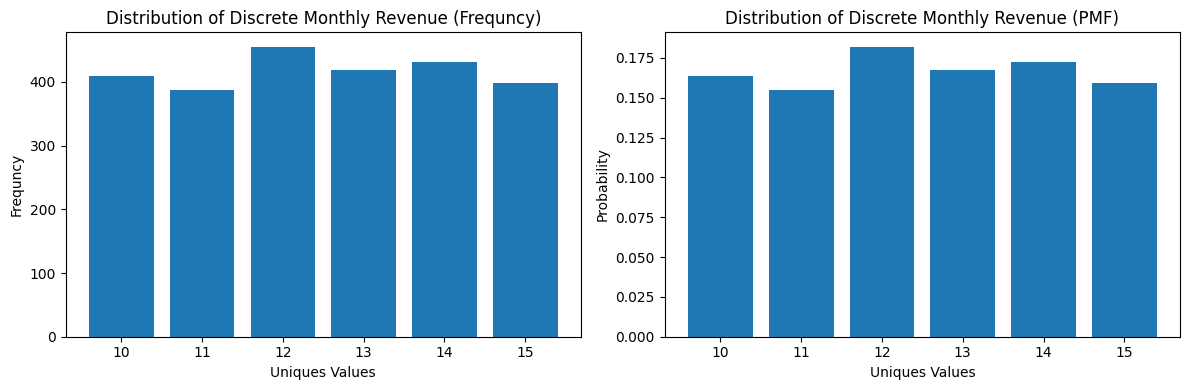

In [14]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


# Plot the first figure on the first subplot
ax1.bar(data.keys(), data.values())
ax1.set_xlabel('Uniques Values')
ax1.set_ylabel('Frequncy')
ax1.set_title('Distribution of Discrete Monthly Revenue (Frequncy)')


# Plot the second figure on the second subplot

# Calculate the total count
total_count = sum(data.values())

# Calculate probabilities by dividing counts by the total count
probabilities = {category: count / total_count for category, count in data.items()}

# Creating a bar chart of probabilities
ax2.bar(probabilities.keys(), probabilities.values())
ax2.set_xlabel('Uniques Values')
ax2.set_ylabel('Probability')
ax2.set_title('Distribution of Discrete Monthly Revenue (PMF)')
#ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for ax2



# Adjust layout and spacing
plt.tight_layout()


# Show both figures
plt.show()


# B. Continoues

# The Features is Continuous Type

    1. Find min & max value 
    2. Find the measure of center (mean, meadin)
    3. Find the Measure of spread (std)
    4. Display histogram 
    5. Display box plot


## Step 1:
    Find min & max value 


In [15]:
print(f'The Min Value is: {df[df_numarical[1]].min()}')
print(f'The Max Value is: {df[df_numarical[1]].max()}')

The Min Value is: 26
The Max Value is: 51


## Step 2:
    Find the Measure of Center (mean, meadin)


In [16]:
print(f'The Mean Value is: {df[df_numarical[1]].mean()}')
print(f'The Median Value is: {df[df_numarical[1]].median()}')

The Mean Value is: 38.7956
The Median Value is: 39.0


## Step 3:
    Find the Measure of Spread (std)


In [17]:
print(f'The Standard Devation is: {df[df_numarical[1]].std()}')

The Standard Devation is: 7.171777631644689


# Step 4:
     Display histogram


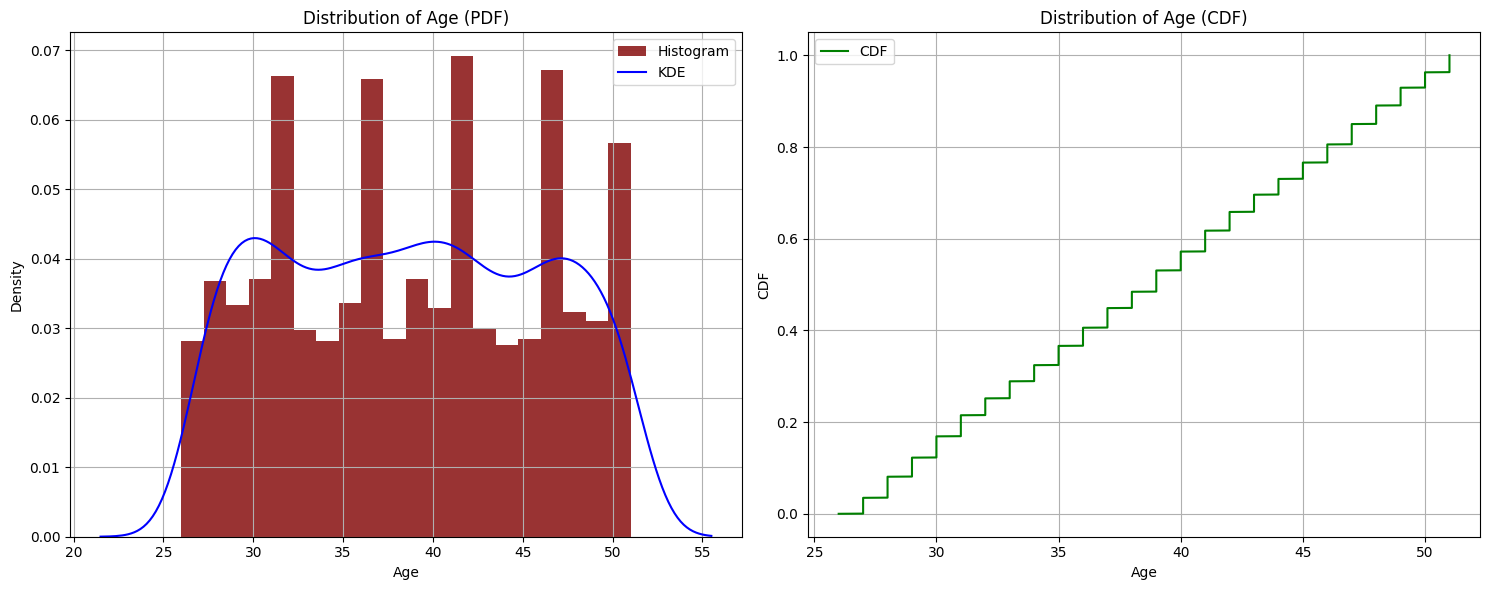

In [18]:
# Create a new figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram and KDE in the first subplot (left)
ax1.hist(df[df_numarical[1]], bins=20, color='maroon', density=True, label='Histogram', alpha=0.8)
sns.kdeplot(df[df_numarical[1]], color='blue', label='KDE', ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Age (PDF)')
ax1.legend()
ax1.grid(True)

# Calculate CDF values
sorted_data = np.sort(df[df_numarical[1]])
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF line in the second subplot (right)
ax2.plot(sorted_data, cdf, color='green', label='CDF')
ax2.set_xlabel('Age')
ax2.set_ylabel('CDF')
ax2.set_title('Distribution of Age (CDF)')
ax2.legend()
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Step 5:
    Display the box plot


<Figure size 1000x500 with 0 Axes>

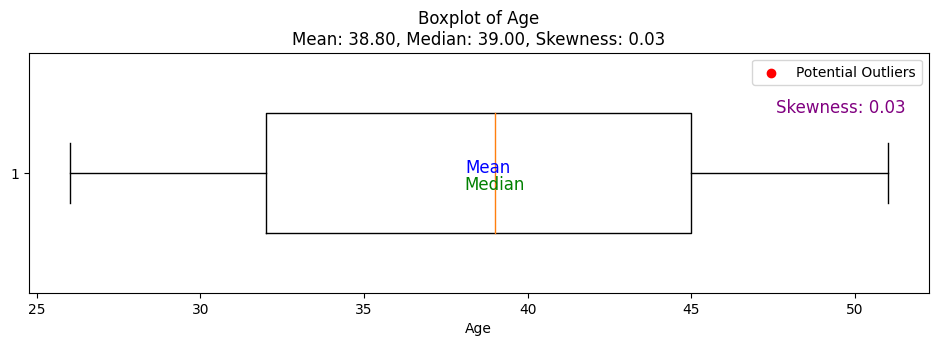

In [19]:
age_data = df[df_numarical[1]]

# Calculate mean, median, and skewness
mean = age_data.mean()
median = age_data.median()
skewness = stats.skew(age_data)

plt.figure(figsize=(10, 5))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 4))

# Center the figure within the plotting area
fig.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

# Create the boxplot centered within the figure
box = ax.boxplot(age_data, vert=False, widths=0.5)

# Set x-axis label
ax.set_xlabel('Age')

# Set the title with mean, median, and skewness
ax.set_title('Boxplot of Age\nMean: {:.2f}, Median: {:.2f}, Skewness: {:.2f}'.format(mean, median, skewness))

# Identify potential outliers
outliers = age_data[age_data > 1.5 * (np.percentile(age_data, 75) - np.percentile(age_data, 25)) + np.percentile(age_data, 75)]

# Highlight potential outliers in red
ax.scatter(outliers, [0] * len(outliers), color='red', marker='o', label='Potential Outliers')

# Add text labels for mean and median
ax.text(mean, 1, 'Mean', fontsize=12, color='blue', horizontalalignment='center')
ax.text(median, 0.93, 'Median', fontsize=12, color='green', horizontalalignment='center')
ax.text(0.83, 0.75, 'Skewness: {:.2f}'.format(skewness), transform=ax.transAxes, fontsize=12, color='purple')

ax.legend()

plt.show()

# Two Column

# How is the distribution of Subscription Types by Monthly Revenue?

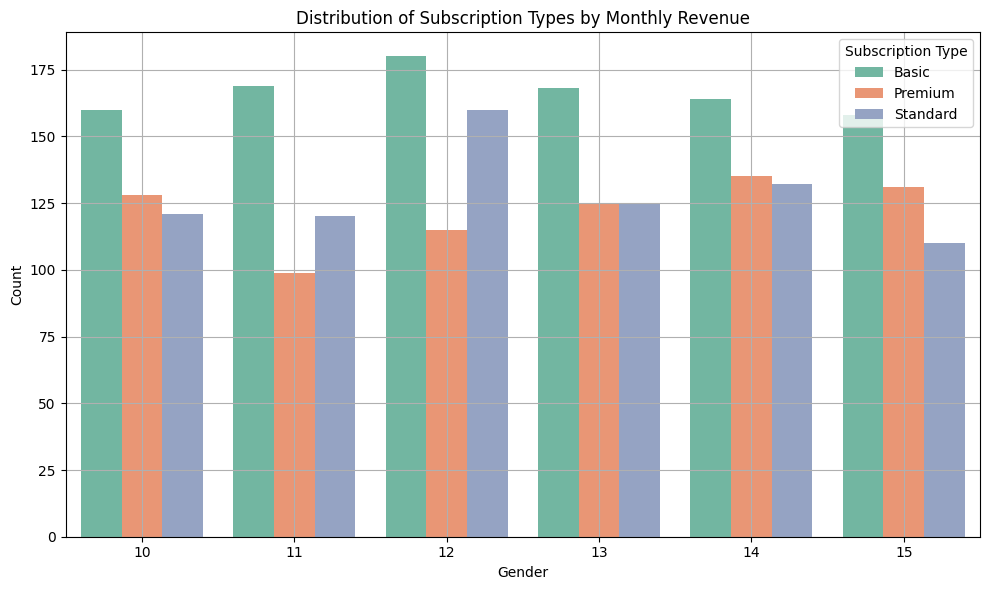

In [20]:
# Assuming you have a DataFrame named 'df' with columns 'Monthly Revenue' and 'Subscription Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Revenue', hue='Subscription Type', palette='Set2')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Subscription Types by Monthly Revenue')
plt.legend(title='Subscription Type', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is the total monthly revenue by subscription type?

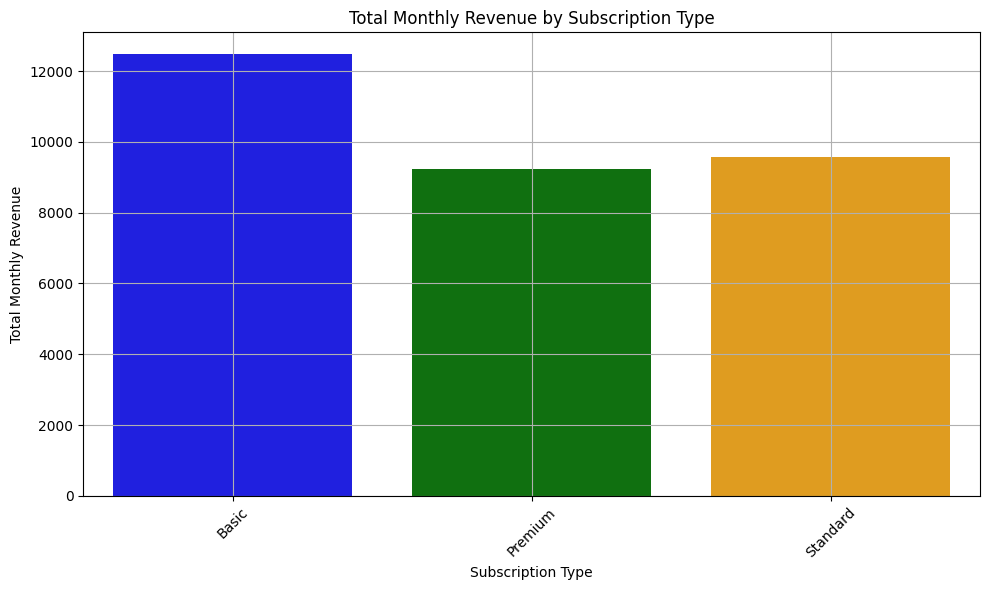

In [21]:
# Assuming you have a DataFrame named 'df' with columns 'Subscription Type' and 'Monthly Revenue'
subscription_revenue = df.groupby('Subscription Type')['Monthly Revenue'].sum().reset_index()

# Define custom colors for each Subscription Type
custom_palette = {'Basic': 'blue', 'Premium': 'green', 'Standard': 'orange'}

# Create a bar plot using Seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=subscription_revenue, x='Subscription Type', y='Monthly Revenue', palette=custom_palette)

plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue')
plt.title('Total Monthly Revenue by Subscription Type')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is the total monthly revenue by country?

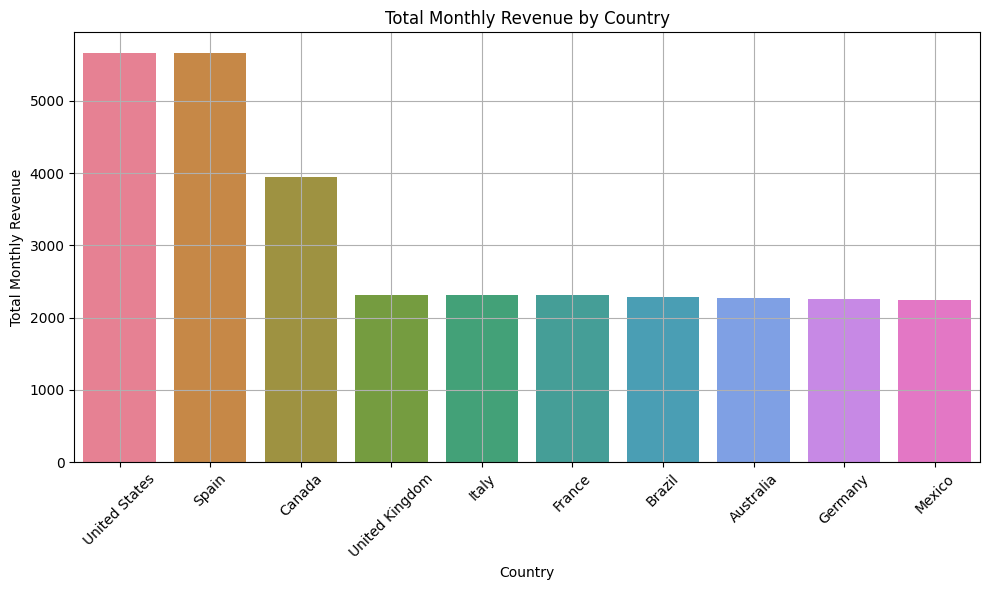

In [22]:
# Assuming you have a DataFrame named 'df' with columns 'Country' and 'Monthly Revenue'
subscription_revenue = df.groupby('Country')['Monthly Revenue'].sum().reset_index()

# Sort the data by 'Monthly Revenue' in descending order
subscription_revenue = subscription_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Define a color palette with distinct colors
colors = sns.color_palette('husl', n_colors=len(subscription_revenue))

# Create a bar plot using Seaborn with different colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(data=subscription_revenue, x='Country', y='Monthly Revenue', palette=colors)

plt.xlabel('Country')
plt.ylabel('Total Monthly Revenue')
plt.title('Total Monthly Revenue by Country')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is the distribution of Subscription Types by Gender?

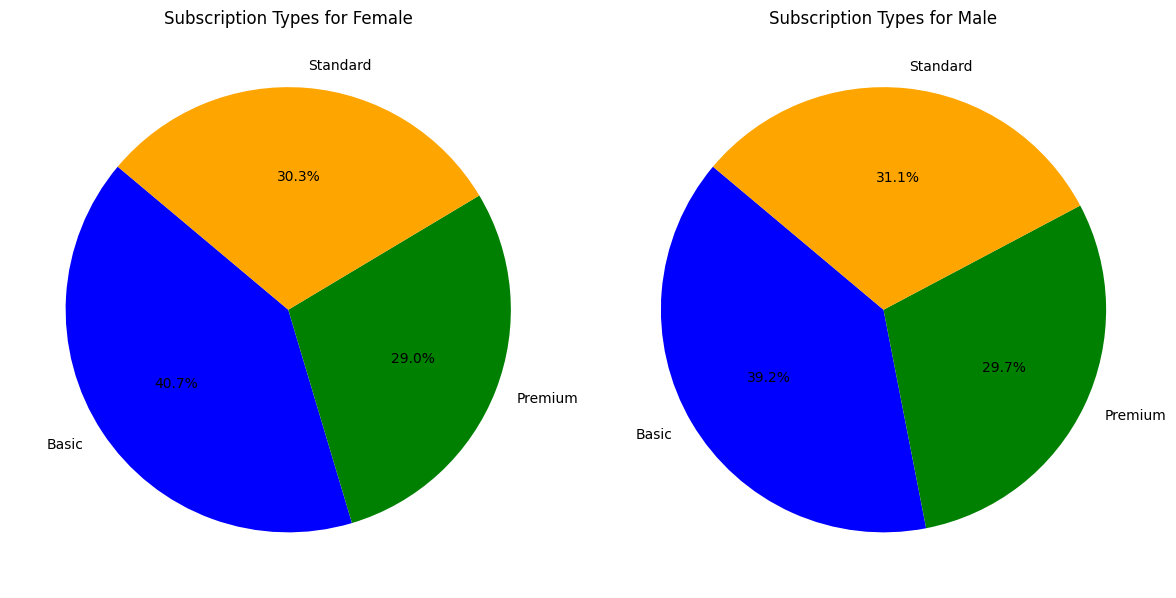

In [23]:
# Assuming you have a DataFrame named 'df' with columns 'Gender' and 'Subscription Type'
gender_subscription_counts = df.groupby(['Gender', 'Subscription Type']).size().unstack().fillna(0)

# Define custom colors for each Subscription Type
custom_colors = {'Basic': 'blue', 'Premium': 'green', 'Standard': 'orange'}

# Create pie plots for each Gender group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_subscription_counts.index):
    ax = axes[i]
    subscriptions = gender_subscription_counts.loc[gender]
    ax.pie(subscriptions, labels=subscriptions.index, colors=[custom_colors.get(sub_type, 'gray') for sub_type in subscriptions.index], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Subscription Types for {gender}')
    
# Display the plots
plt.tight_layout()
plt.show()

# How is age distributed among different subscription types?

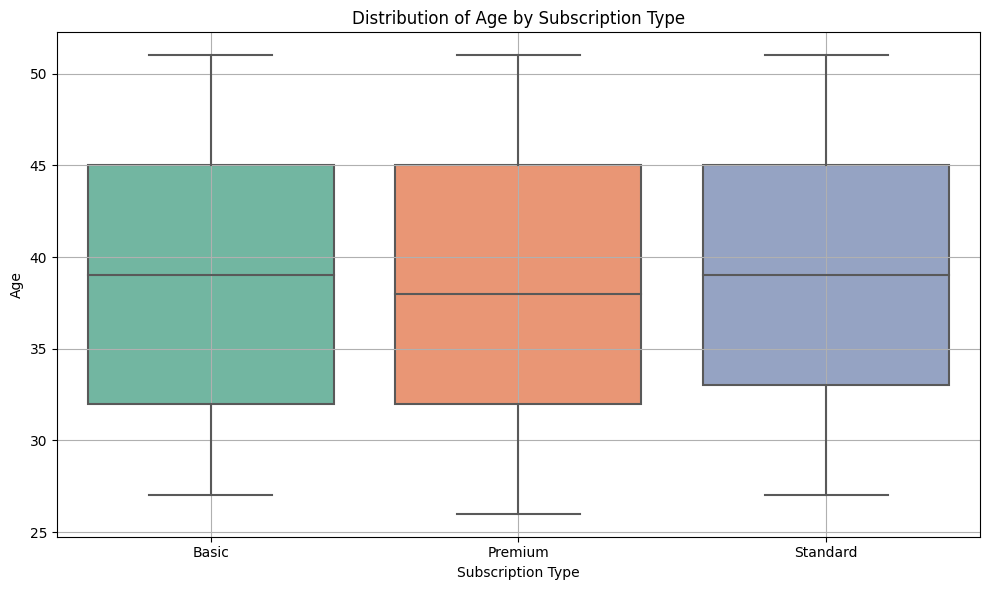

In [24]:
# Assuming you have a DataFrame named 'df' with columns 'Subscription Type' and 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Subscription Type', y='Age', palette='Set2')

plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.title('Distribution of Age by Subscription Type')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is gender distributed among different device types?

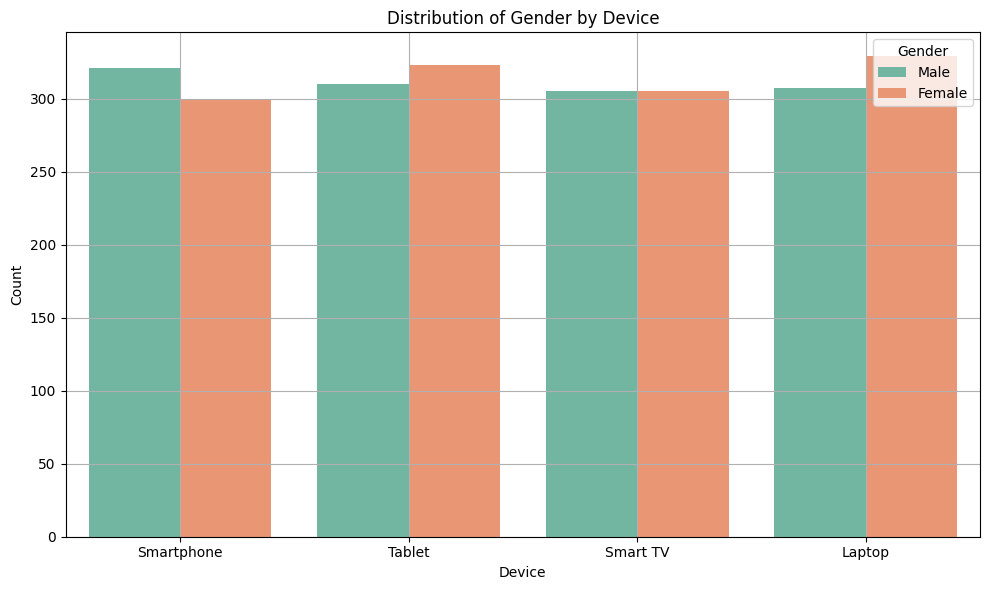

In [25]:
# Assuming you have a DataFrame named 'df' with columns 'Device' and 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Device', hue='Gender', palette='Set2')

plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Gender by Device')
plt.legend(title='Gender', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is the distribution of subscription types categorized by device types?

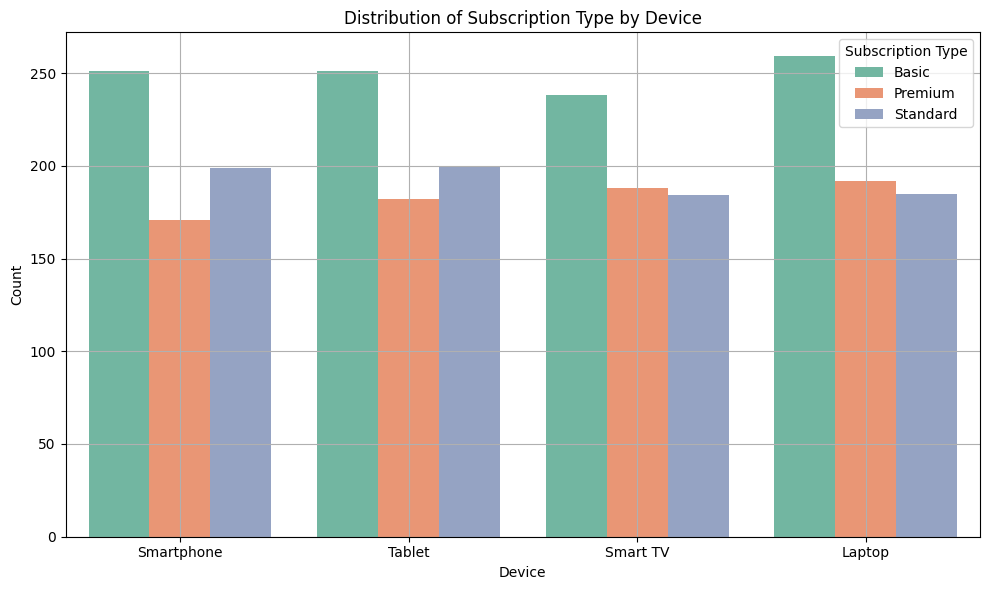

In [26]:
# Assuming you have a DataFrame named 'df' with columns 'Device' and 'Subscription Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Device', hue='Subscription Type', palette='Set2')

plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Subscription Type by Device')
plt.legend(title='Subscription Type', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is age distributed among different gender types?

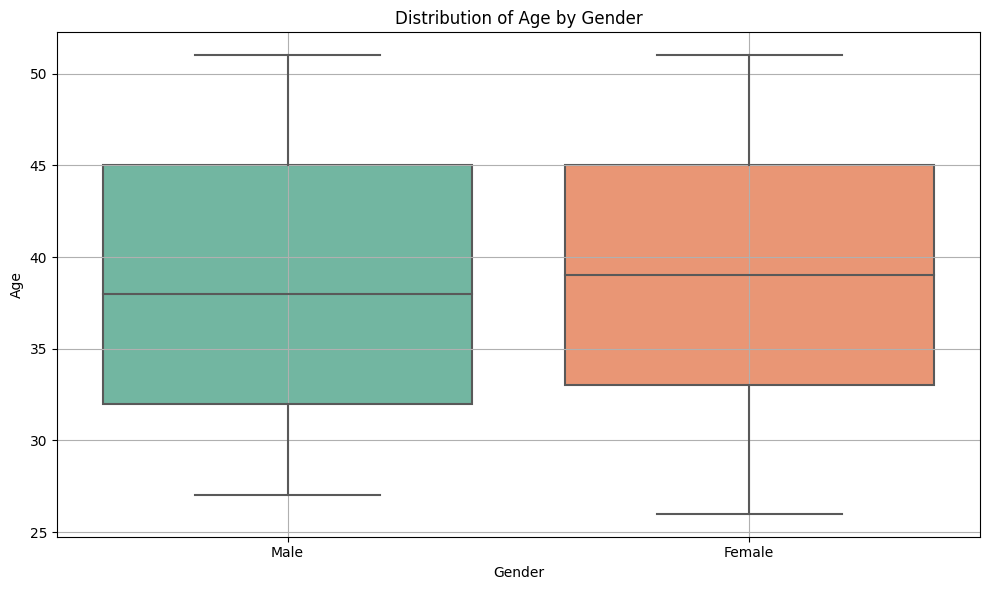

In [27]:
# Assuming you have a DataFrame named 'df' with columns 'Subscription Type' and 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age', palette='Set2')

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# How is gender distributed among different country types

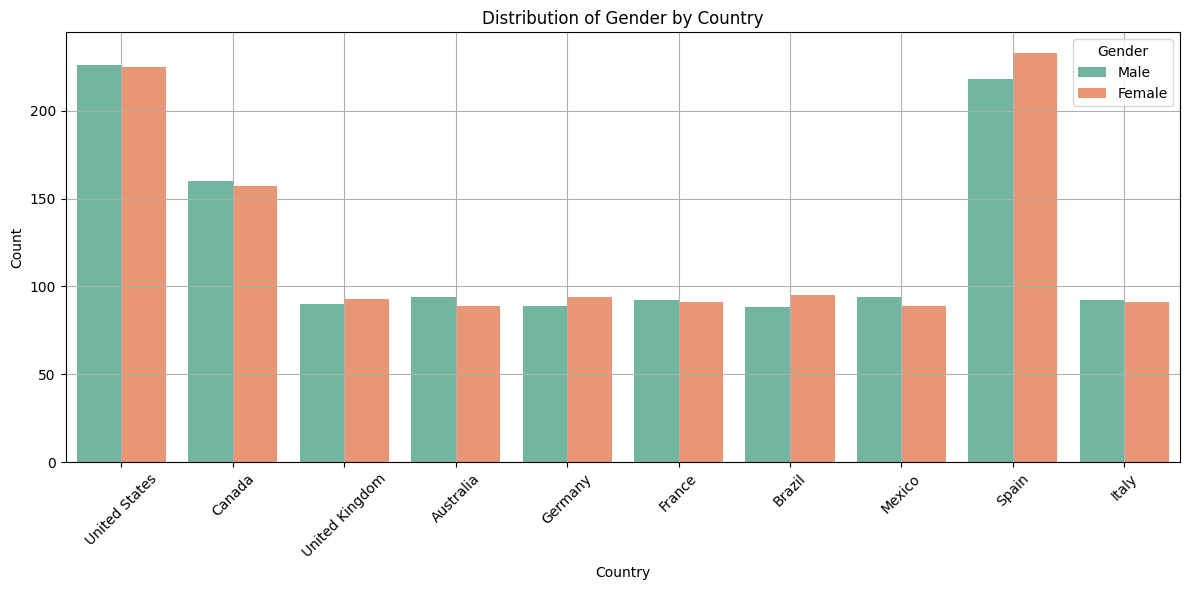

In [28]:
# Assuming you have a DataFrame named 'df' with columns 'Country' and 'Gender'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Gender', palette='Set2')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Gender by Country')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Three Column

# What is the total monthly revenue for each combination of Subscription Type and Gender?

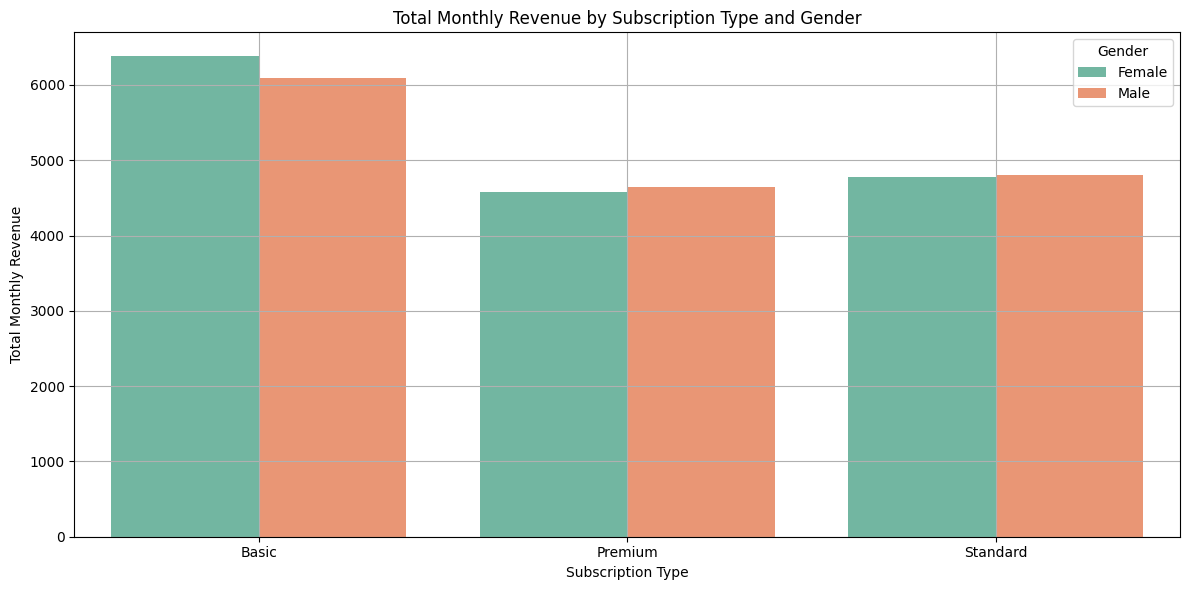

In [29]:
# Group the DataFrame by 'Subscription Type' and 'Gender' and calculate the sum of 'Monthly Revenue'
revenue_by_subscription_gender = df.groupby(['Subscription Type', 'Gender'])['Monthly Revenue'].sum().reset_index()

# Assuming you have a DataFrame named 'revenue_by_subscription_gender' with columns 'Subscription Type,' 'Gender,' and 'Monthly Revenue'
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_subscription_gender, x='Subscription Type', y='Monthly Revenue', hue='Gender', palette='Set2')

plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue')
plt.title('Total Monthly Revenue by Subscription Type and Gender')
plt.legend(title='Gender', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()